In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, kruskal
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from geopy.distance import geodesic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the file path and load
file_path = '/content/drive/My Drive/Colab Notebooks/DAT 490 CAPSTONE/DataCoSupplyChainDatasetRefined.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
print(df.head())
print(df.info())

       type  days_for_shipping_real  days_for_shipment_scheduled  \
0     DEBIT                       3                            4   
1  TRANSFER                       5                            4   
2      CASH                       4                            4   
3     DEBIT                       3                            4   
4   PAYMENT                       2                            4   

   benefit_per_order  sales_per_customer   delivery_status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   late_delivery_risk  category_id   category_name customer_city  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   

In [ ]:
# Ensure relevant columns are in the right format
df['late_delivery_risk'] = df['late_delivery_risk'].astype(int)
df['delivery_time_diff'] = df['days_for_shipping_real'] - df['days_for_shipment_scheduled']

In [ ]:
# Check unique regions
print(df['order_region'].value_counts())

order_region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: count, dtype: int64


In [ ]:
### Chi-Square Test: Late Delivery Risk Across Regions ###
contingency_table = pd.crosstab(df['order_region'], df['late_delivery_risk'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.8f}")


Chi-Square Test Results:
Chi-Square Statistic: 74.9336, p-value: 0.00000011


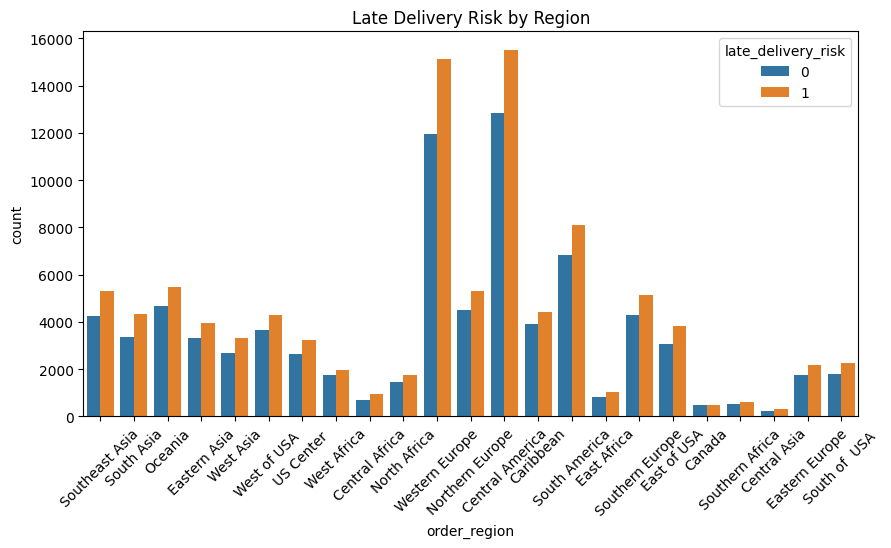

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='order_region', hue='late_delivery_risk')
plt.xticks(rotation=45)
plt.title("Late Delivery Risk by Region")
plt.show()

In [ ]:
### Comparing Delivery Time Differences Across Regions ###
# Kruskal-Wallis test (non-parametric alternative to ANOVA)
groups = [df[df['order_region'] == region]['delivery_time_diff'].dropna() for region in df['order_region'].unique()]
h_stat, p_value = kruskal(*groups)

In [ ]:
print("\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}, p-value: {p_value:.8f}")


Kruskal-Wallis Test Results:
H-statistic: 60.9680, p-value: 0.00001605


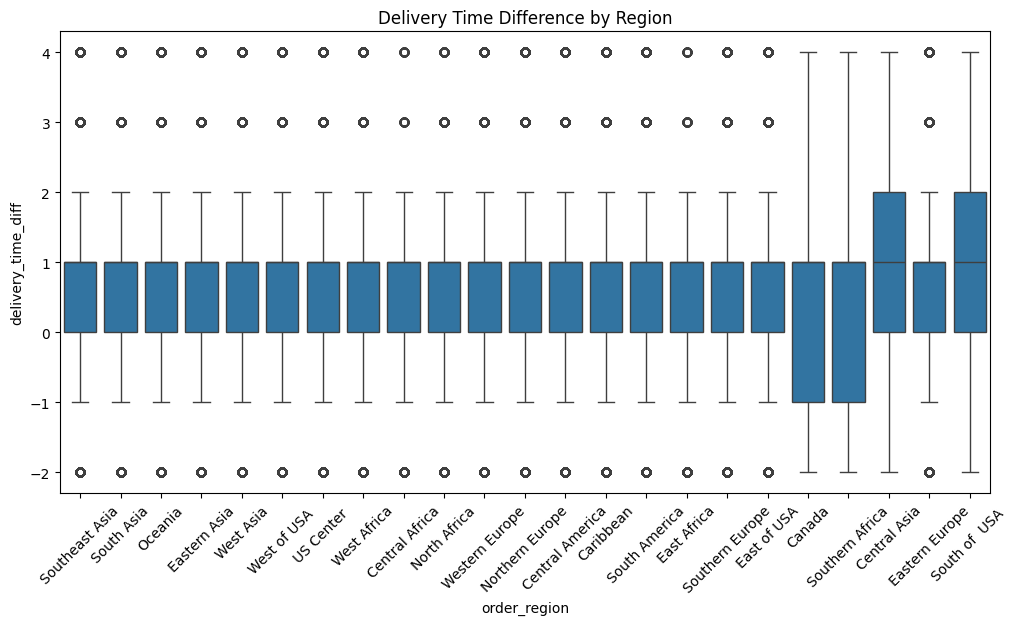

In [ ]:
# Boxplot of delivery time differences by region
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='order_region', y='delivery_time_diff')
plt.xticks(rotation=45)
plt.title("Delivery Time Difference by Region")
plt.show()

In [ ]:
# Define U.S. regions (Adjust as needed based on your dataset)
us_regions = ["West of USA", "US Center", "East of USA", "South of USA"]


T-test: U.S. vs. Global Delivery Performance
T-statistic: 1.1016, p-value: 0.2707


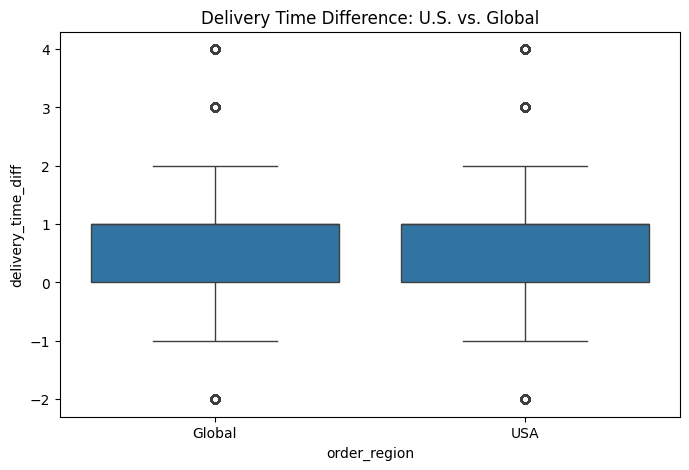

In [ ]:
# Create two groups: U.S. vs. Global
us_group = df[df['order_region'].isin(us_regions)]['delivery_time_diff'].dropna()
global_group = df[~df['order_region'].isin(us_regions)]['delivery_time_diff'].dropna()

# Perform an independent t-test (assuming unequal variances)
t_stat, p_value = ttest_ind(us_group, global_group, equal_var=False)

print("\nT-test: U.S. vs. Global Delivery Performance")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Visualizing the comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=df['order_region'].apply(lambda x: "USA" if x in us_regions else "Global"), y="delivery_time_diff")
plt.title("Delivery Time Difference: U.S. vs. Global")
plt.show()